In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

from keras.datasets import mnist # مثل دیجیت ولی جای 8.8 الان 28.28

In [3]:
data = mnist.load_data()

In [4]:
(x_train, y_train), (x_test, y_test) = data

In [5]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

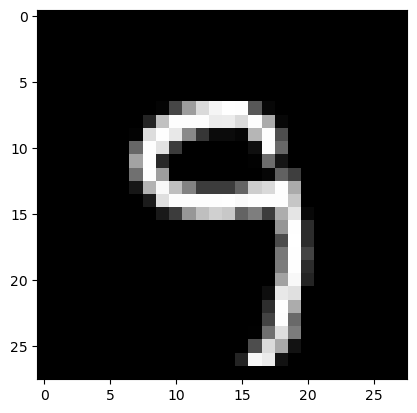

In [6]:
plt.imshow(x_train[14116], cmap='gray')

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [8]:
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)
y_train_oh[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [9]:
x_train_vec = x_train.reshape(60000, -1)/255
x_test_vec = x_test.reshape(10000, -1) /255

In [10]:
print(x_train_vec.max(), x_train_vec.min())

1.0 0.0


- در شبکه عصبی دیتارو بیاریم روی 0 و1 که شبکه سبک تر بشه
- تصویر معمولا نرمال نیست

In [11]:
len(np.unique(y_train)),x_train_vec.shape[1]

(10, 784)

In [12]:
model = Sequential()

model.add(Input(shape = (x_train_vec.shape[1],)))

model.add(Dense(x_train_vec.shape[1],activation='relu'))

model.add(Dense(256,activation='relu'))

model.add(Dense(len(np.unique(y_train)),activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 818,970 (3.12 MB)

 Trainable params: 818,970 (3.12 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile( optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

![alt text](image-10.png)

In [14]:
res = model.fit(x_train_vec,y_train_oh,epochs=2,validation_data=(x_test_vec,y_test_oh))

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 26ms/step - accuracy: 0.9058 - loss: 0.3041 - val_accuracy: 0.9687 - val_loss: 0.1003
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.9758 - loss: 0.0783 - val_accuracy: 0.9701 - val_loss: 0.0913


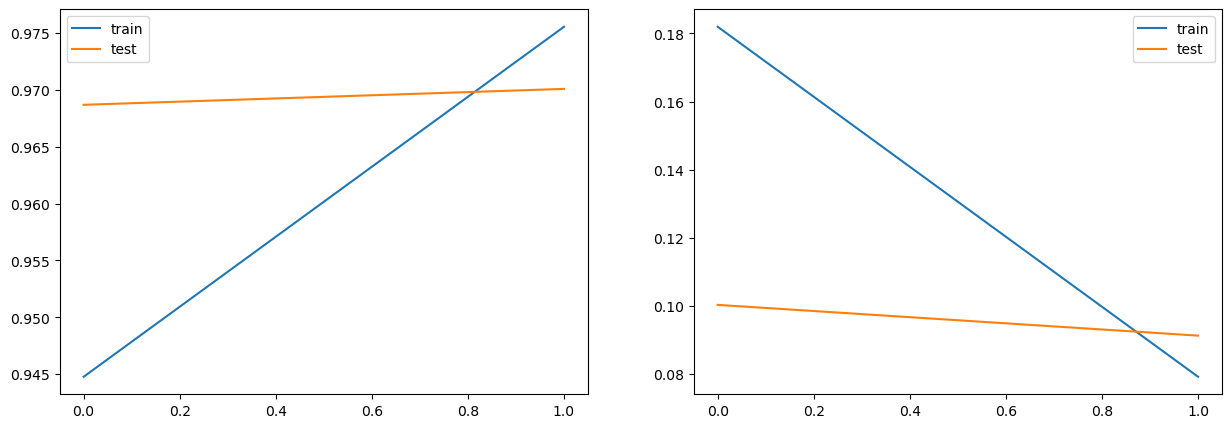

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])
plt.legend(['train','test'])
plt.subplot(1,2,2)
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.legend(['train','test']);

In [17]:
model.save('1_3_model.h5')